In [1]:
pip install tensorflow numpy opencv-python matplotlib


In [5]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive


In [15]:
print("Welcome to the Handwritten Digits Recognition v1.0")

# Mount Google Drive
drive.mount('/content/drive')

# Path to your Google Drive digits folder
digits_folder = '/content/drive/MyDrive/digits'

Welcome to the Handwritten Digits Recognition v1.0
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Decide if to load an existing model or to train a new one
train_new_model = True

if train_new_model:
    # Load and split the MNIST dataset
    mnist = tf.keras.datasets.mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalize the data to have values between 0 and 1
    X_train = tf.keras.utils.normalize(X_train, axis=1)
    X_test = tf.keras.utils.normalize(X_test, axis=1)

    # Data augmentation
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1
    )
    datagen.fit(X_train.reshape(-1, 28, 28, 1))  # Fit on training data

    # Define the improved neural network model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model with augmented data
    model.fit(datagen.flow(X_train.reshape(-1, 28, 28, 1), y_train, batch_size=32),
              epochs=10, validation_data=(X_test.reshape(-1, 28, 28, 1), y_test))

    # Evaluate the model with reshaped test data
    val_loss, val_acc = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
    print("Validation Loss:", val_loss)
    print("Validation Accuracy:", val_acc)

    # Save the model for future use
    model.save('handwritten_digits.keras')
else:
    # Load a pre-trained model
    model = tf.keras.models.load_model('handwritten_digits.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.7252 - loss: 0.8532 - val_accuracy: 0.9582 - val_loss: 0.1353
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 23ms/step - accuracy: 0.9108 - loss: 0.2959 - val_accuracy: 0.9643 - val_loss: 0.1109
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9267 - loss: 0.2504 - val_accuracy: 0.9731 - val_loss: 0.0920
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9356 - loss: 0.2315 - val_accuracy: 0.9733 - val_loss: 0.0847
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.9369 - loss: 0.2264 - val_accuracy: 0.9729 - val_loss: 0.0935
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - accuracy: 0.9432 - loss: 0.2160 - val_accuracy: 0.9757 - val_loss: 0.0840
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - accuracy: 0.9438 - loss: 0.2123 - val_accuracy: 0.9729 - val_loss: 0.0873
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.9455 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
The number is probably a 8


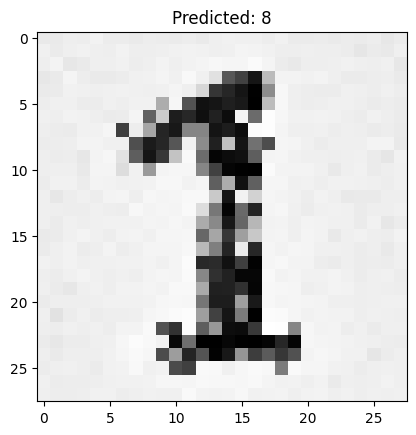

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The number is probably a 2


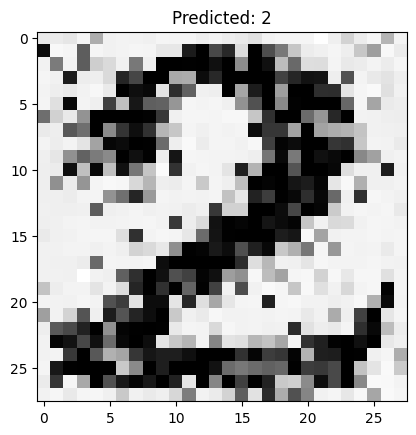

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The number is probably a 8


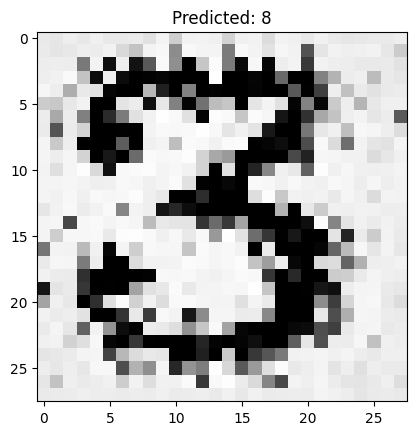

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The number is probably a 8


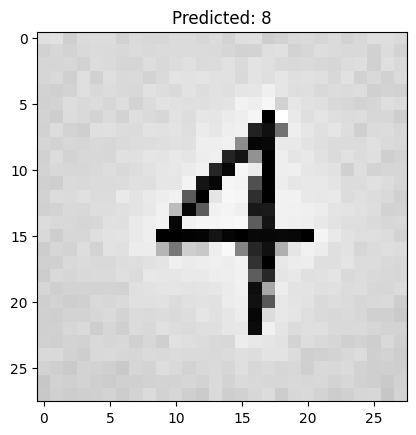

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The number is probably a 8


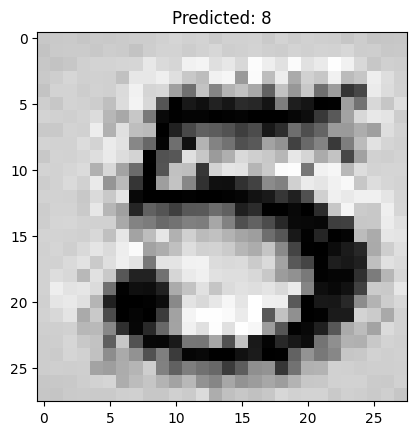

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The number is probably a 8


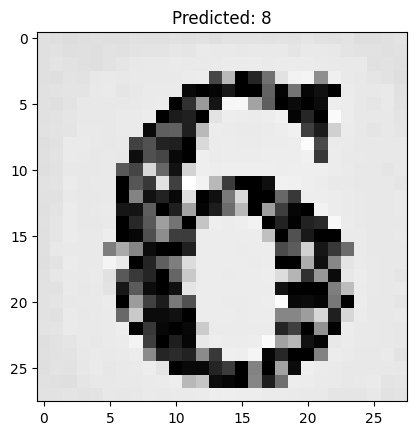

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The number is probably a 2


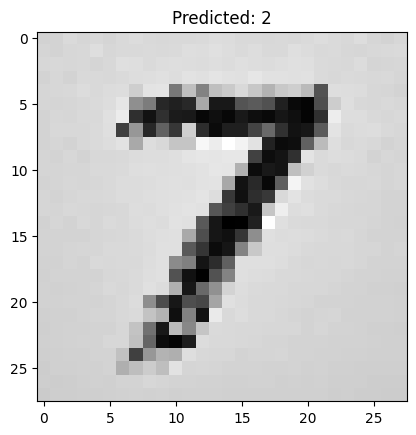

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The number is probably a 8


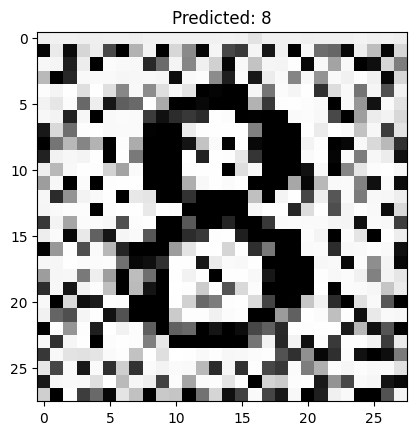

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The number is probably a 8


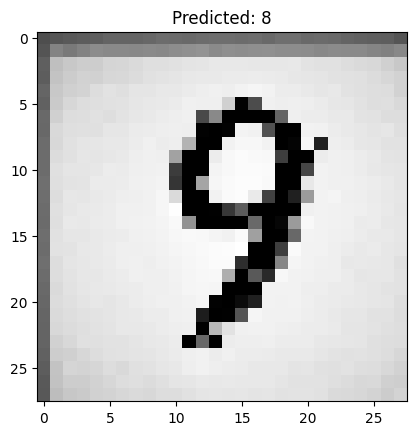

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The number is probably a 0


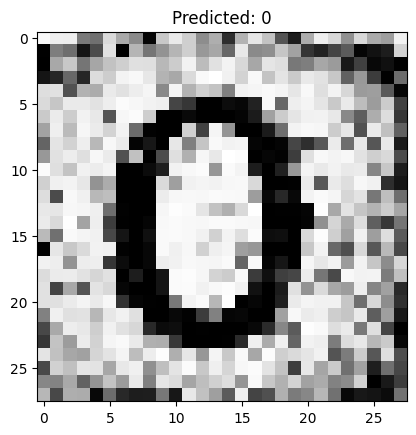

In [18]:
# Load custom images for prediction
image_number = 1
while os.path.isfile(f'{digits_folder}/digit ({image_number}).png'):
    try:
        # Read and process each image
        img_path = f'{digits_folder}/digit ({image_number}).png'
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = np.invert(img)  # Invert image colors
        img = cv2.resize(img, (28, 28))  # Resize to match MNIST data size
        img = img.reshape(1, 28, 28, 1) / 255.0  # Normalize and reshape for the model

        # Predict the digit
        prediction = model.predict(img)
        print(f"The number is probably a {np.argmax(prediction)}")

        # Display the image
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.title(f"Predicted: {np.argmax(prediction)}")
        plt.show()

        image_number += 1
    except Exception as e:
        print("Error reading image:", e)
        image_number += 1
